<a href="https://colab.research.google.com/github/PhamTienLoc/Lab_DM/blob/main/Lab_5_21130429_PhamTienLoc.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# DM Lab 5: Regression
# 21130429 - Phạm Tiến Lộc


# Regression

- Classification predicts a **categorical** value
    - a finite set of values
- Regression predicts a **numerical** value
    - a possibly infinite set of values
    - can be interpolating or extrapolating

## Regression Estimators

Regression estimators work in the same way as classification estimators in scikit-learn:

Linear Regression Models:
- [LinearRegression](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html)
- [Ridge](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Ridge.html#sklearn.linear_model.Ridge)

K-Nearest Neighbor Regression:
- [KNeighborsRegressor](https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsRegressor.html)

Decision Tree Regression:
- [DecisionTreeRegressor](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeRegressor.html)

Neural Network Regression:
- [MLPRegressor](https://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPRegressor.html)

In [2]:
from google.colab import drive
drive.mount('/content/gdrive')
%cd '/content/gdrive/MyDrive/data'

Mounted at /content/gdrive
/content/gdrive/MyDrive/data


#Import libraries

In [31]:
import pandas as pd
import matplotlib.pyplot as plt
import itertools
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import Ridge
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.feature_selection import RFECV
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.feature_selection import SelectKBest, SelectFwe
from sklearn.feature_selection import f_regression
from sklearn.pipeline import Pipeline

#Task 1. With **dataset1**

#Task 1.1. Load **dataset1** using Pandas and split 70% for training set and 30% for test set

In [41]:
#code
ds1 = pd.read_csv('dataset1.csv')

length = ds1['length']
weight = ds1['weight']

features = ds1['age'].values.reshape(-1,1)

length_train, length_test, length_target_train, length_target_test = train_test_split(features,length, test_size=0.3, random_state=42)

weight_train, weight_test, weight_target_train, weight_target_test = train_test_split(features,weight, test_size=0.3, random_state=42)

#Task 1.2. Generate plots to determine the relationship between each combination as belows (i.e., between age and temp, between age and weight, ...)

age temp
age weight
age length
temp weight
temp length
weight length


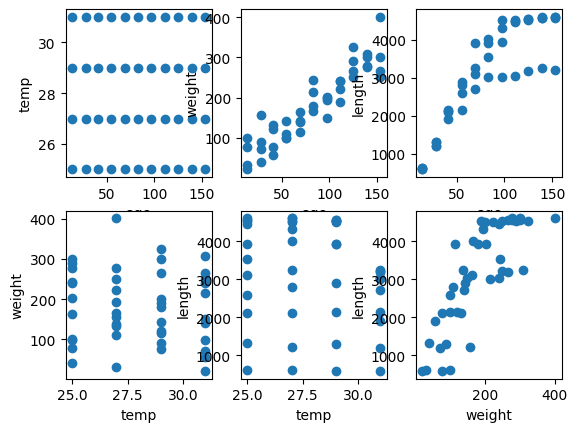

In [42]:
#code
# a list of all columns
feature_list = [ 'age', 'temp', 'weight', 'length' ]
ix = 1
fig = plt.figure()
# generate all combinations of considered columns
combinations = itertools.combinations(feature_list, 2)
for com in combinations:
  print(com[0], com[1])
  axs = fig.add_subplot(2,3, ix)

  axs.scatter(ds1[com[0]], ds1[com[1]])

  axs.set_xlabel(com[0])
  axs.set_ylabel(com[1])

  ix+=1


In [ ]:
#code

#Task 1.3. Apply LinearRegression to which combinations that have linear relationship.

In [43]:
#code
linear_regression = LinearRegression()
estimator1 = linear_regression.fit(length_train, length_target_train)

estimator2 = linear_regression.fit(weight_train, weight_target_train)

#Task 1.4. Plot train/test/prediction to visualize the relationship between them

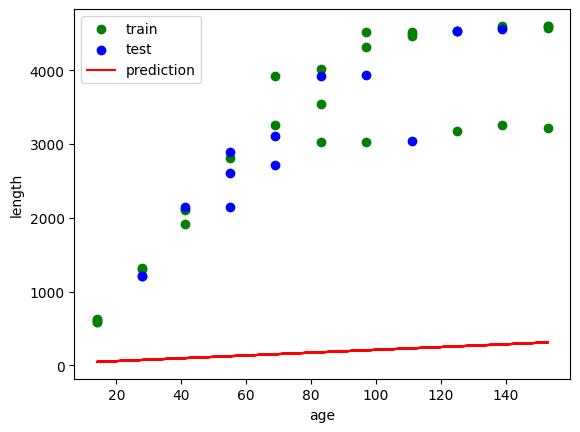

In [44]:
#code
plt.scatter(length_train, length_target_train, c='green', label='train')
plt.scatter(length_test, length_target_test, c='blue', label='test')

plt.plot(ds1['age'], estimator1.predict(features), c='red', label='prediction')

plt.xlabel('age')
plt.ylabel('length')
plt.legend()
plt.show()


#Task 1.5. Apply Polynomial regression to which combinations that have non-linear relationship

In [50]:
#code
poly = PolynomialFeatures(degree=2, include_bias=False)

pipeline = Pipeline([('transformer', poly), ('estimator', estimator1)])

pipeline.fit(length_train, length_target_train)

prediction = pipeline.predict(features)

#Task 1.6. Plot train/test/prediction to visualize the relationship between them

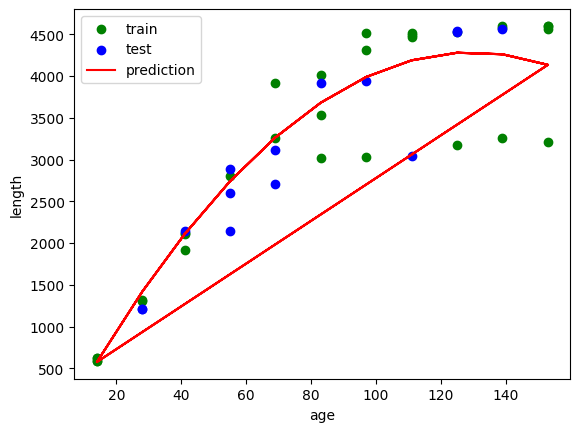

In [51]:
#code
plt.scatter(length_train, length_target_train, c='green', label='train')
plt.scatter(length_test, length_target_test, c='blue', label='test')

plt.plot(ds1['age'], prediction, c='red', label='prediction')

plt.xlabel('age')
plt.ylabel('length')
plt.legend()
plt.show()

#Task 1.7. Measure the performance of the different regression models trained before. Use 10-fold cross validation and MSE as well as R² for evaluation.

In [38]:
#code
length_prediction = cross_val_predict(estimator1, features, length)

mse = mean_squared_error(length, length_prediction)
r2 = r2_score(length, length_prediction)
print('MSE: ', mse)
print('R2: ', r2)


MSE:  523446.5556830205
R2:  0.6967290132690376


##Task 1.8. Apply GridSeachCV to find the influence of **k** on performance of **KNeighborsRegressor**

In [ ]:
#code

#Task 2. With dataset2

#Task 2.1. Load **dataset2**, apply StandardScaler() to standardize datataset and repare trainning set, test set. Notice that, y is **Birthweigth** column; **id** column needs to drop.

In [ ]:
#code

#Task 2.2. Apply Linear Regression to the training set/test set obtained in Task 2.1. Report the perfomrance of the model on test set in termns of RMSE, R^2

In [ ]:
#code

#Task 2.3. Apply feature selection to find the most correlated feature to the target (y) using F-Regression and inspect the p-values for each feature.


*   Then, fit a second regression model using only the significant features (p<=0.05). How does the performance (i.e., RMSE, R^2) of the model change?



In [ ]:
#code

#Task 3. With **dataset3**
The dataset3 included 12 continuous attributes and 1 binary attribute concerning the price of houses.

#Task 3.1. Load **dataset3**, apply StandardScaler() to standardize datataset and repare trainning set, test set

In [ ]:
#code

#Task 3.2. Apply **LinearRegression**, **Ridge**, **KNeighborsRegressor**, **DecisionTreeRegressor**, **MLPRegressor** to train models using above training set

In [ ]:
#code

#Task 3.3. Report the performance of models using metrics RMSE, R^2 (as PrettyTable)

In [ ]:
#code

In [ ]:
#Pretty table demo
from prettytable import PrettyTable

# Specify the Column Names while initializing the Table
myTable = PrettyTable(["Student Name", "Class", "Section", "Percentage"])

# Add rows
myTable.add_row(["Leanord", "X", "B", "91.2 %"])
myTable.add_row(["Penny", "X", "C", "63.5 %"])
myTable.add_row(["Howard", "X", "A", "90.23 %"])
myTable.add_row(["Bernadette", "X", "D", "92.7 %"])
myTable.add_row(["Sheldon", "X", "A", "98.2 %"])
myTable.add_row(["Raj", "X", "B", "88.1 %"])
myTable.add_row(["Amy", "X", "B", "95.0 %"])

print(myTable)

+--------------+-------+---------+------------+
| Student Name | Class | Section | Percentage |
+--------------+-------+---------+------------+
|   Leanord    |   X   |    B    |   91.2 %   |
|    Penny     |   X   |    C    |   63.5 %   |
|    Howard    |   X   |    A    |  90.23 %   |
|  Bernadette  |   X   |    D    |   92.7 %   |
|   Sheldon    |   X   |    A    |   98.2 %   |
|     Raj      |   X   |    B    |   88.1 %   |
|     Amy      |   X   |    B    |   95.0 %   |
+--------------+-------+---------+------------+
